In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

In [3]:
datasus = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"
                      ,encoding='iso-8859-1',sep=';',skiprows=3,thousands='.',decimal=',')

In [4]:
datasus = datasus.iloc[:27]

In [5]:
pd.options.display.float_format = "{:.2f}".format

In [6]:
datasus["2020/Ago"] = datasus["2020/Ago"].apply(lambda x: x.replace('-','0').replace(',','.')).astype('float')

In [7]:
datasus['Unidade da Federação'] = datasus['Unidade da Federação'].str.replace('\d+.','')

In [8]:
colunas = datasus.mean().index.tolist()

In [9]:
colunas.insert(0,'Unidade da Federação')

In [10]:
datasus = datasus[colunas]

In [11]:
datasus = datasus.set_index('Unidade da Federação')

In [12]:
# sns.set(font_scale=1.4)
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [13]:
top_5_estados = datasus.sort_values(by='Total',ascending=False).copy()

In [14]:
datasus.drop(columns=['Total'],axis=0,inplace=True)
top_5_estados.drop(columns=['Total'],axis=0,inplace=True)

In [15]:
top_5_estados = top_5_estados.iloc[:5]

In [16]:
datasus = datasus.T
top_5_estados = top_5_estados.T

In [22]:
datasus.tail()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,...,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,...,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,...,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,...,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26
2020/Ago,3556381.57,0.00,4726485.73,1524478.04,11559714.54,834187.31,2453362.74,10916718.78,7926321.69,14559529.59,...,10824255.26,36264322.65,140414944.95,41542401.16,16991236.43,28349257.38,4059220.22,6174224.99,20242641.73,12044848.02


In [18]:
datasus = datasus.iloc[6:]
top_5_estados = top_5_estados.iloc[6:]

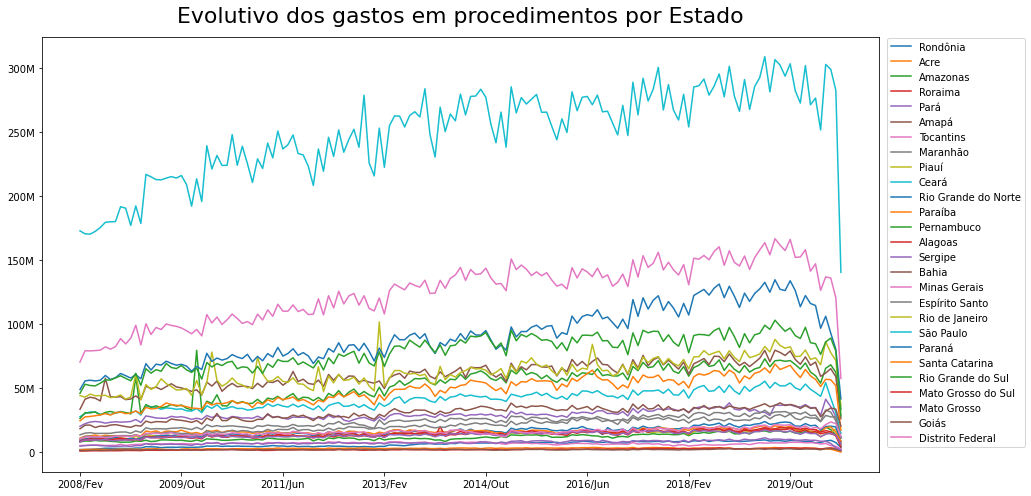

In [19]:
datasus.plot(figsize=(15,8))
plt.title("Evolutivo dos gastos em procedimentos por Estado", y=1.02, fontsize=22)
plt.legend(loc='upper right',bbox_to_anchor=(1.18, 1.01))
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

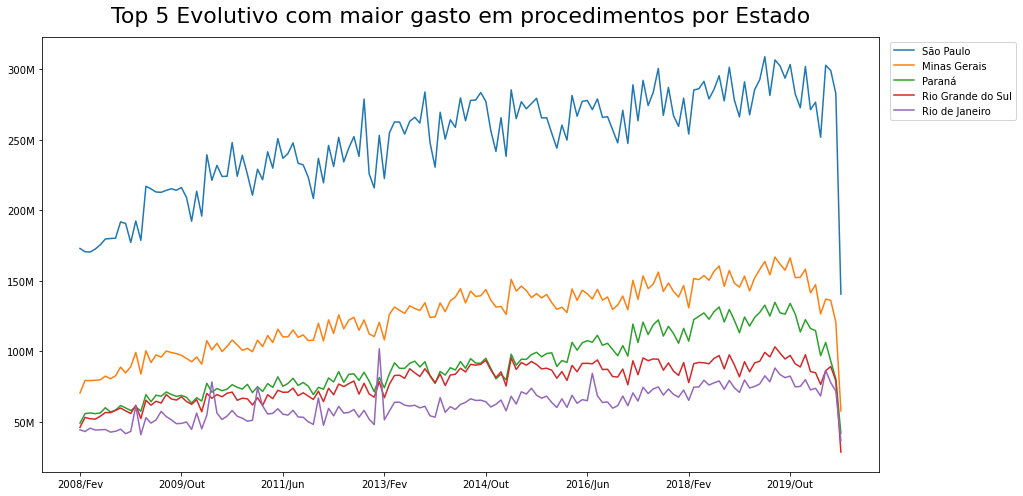

In [36]:
top_5_estados.plot(figsize=(15,8))
plt.title("Top 5 Evolutivo com maior gasto em procedimentos por Estado", y=1.02, fontsize=22)
plt.legend(loc='upper right',bbox_to_anchor=(1.17, 1))
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()